<a href="https://colab.research.google.com/github/smarcondes-ds/Data_Science/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*


# A violência no Rio de Janeiro

<center><img alt="Rio de Janeiro" width="40%" src="https://dia.portalodia.com/media/editor/charge1506166202.jpg"></center>


> O tema violência anda meio esquecido em tempos de pandemia mundial, porém não dá para negar que o assunto faz parte do cotidiano da população brasileira, tornando o país um dos lideres mundiais nessa questão quando no ano de 2019 tivemos mais de 40 mil pessoas assassinadas em todo país.

> A cidade do Rio de Janeiro, cartão postal do Brasil mundo afora, é conhecida pelas suas belezas naturais sendo o principal destino dos turistas de todo o planeta. Porém também é marcada como uma das cidades mais violentas do país, onde com grande frequencia observamos noticias sobre trafico de drogas, assassinatos, arrastões e os mais variados tipos de crimes cometidos.

> Abaixo iremos analisar os dados abertos publicados pelo Governo do Rio de Janeiro através do portal [ISPDados](http://www.ispdados.rj.gov.br/estatistica.html) referente os indicadores estatisticos da violência no estado.

## Obtenção dos Dados

> Os dados que serão analisados foram coletados do Portal ISPDados, plataforma que o governo do estado utiliza para divulgação das estatisticas da Secretária de Segurança Publica. 

> As estatisticas divulgadas são formadas a partir dos Registros de Ocorrência (RO) manifestadas nas delegacias de Polícial Civil do estado, além de informações complementares de orgãos especificos da Policia Militar do Estado do Rio de Janeiro.

## Importando os Dados

In [2]:
# Importando os Pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Importando o DataSet
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## Análise Inicial dos Dados

> Para iniciarmos nossa analise de dados, iremos explorar nosso dataset verificando o tamanho do conjunto de dados coletado, para saber quais quantidades de linhas e colunas que estamos estudando.

In [4]:
# Verificando o Tamanho do DataFrame
print("Dimensões do DataFrame")
print("Entradas:\t",df.shape[0])
print("Colunas:\t",df.shape[1])

Dimensões do DataFrame
Entradas:	 344
Colunas:	 56


> Depois de verificar o tamanho do nosso dataset, abaixo iremos listar as colunas existentes no conjunto de dados e os tipos de cada uma das variaveis. Essa analise irá nos direcionar nossa análise.

In [5]:
# Verificando os Nomes da Colunas e os Tipos das Variaveis
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

> Os dados apresentados acima estão sendo demonstrados em formato numérico sendo eles em `float` ou `int`.

> Abaixo iremos verificar as 5 primeiras linhas do dataset para observamos como eles estão distribuidos dentro do arquivo analisado.

In [28]:
# Visualizando os 5 Primeiros Registros
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


> Na visualização acima, podemos observar através da nomenclatura `NaN` que no inicio do dataset existem algumas colunas com valores ausentes. Abaixo iremos visualizar as 5 últimas linhas do conjunto de dados para verificar se os padrões de ausência de dados de repetem.

In [7]:
# Visualizando os 5 Ultimos Registros
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


> Analisando os útimos registros, observamos a inexistência de valores ausentes, uma hipotese levantada é que no inicio do dataset que se refere ao ano de 1991, alguns tipos de ocorrências não eram registrados pelos orgãos responsáveis.

> Abaixo iremos vericar qual o percentual de ausência em relação ao total de linhas apresentadas no conjunto de dados.


In [8]:
# Identificando a quantidade de valores ausentes por coluna (Percentual)
(df.isnull().sum()).sort_values(ascending=False)/ df.shape[0]

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

> Como podemos observar, algumas colunas como `roubo_bicicleta` e `apreensao_drogas_sem_autor` possuem um percentual alto de valores ausentes em relação ao total apresentado. Uma das formas de se analisar essa variavel é desconsiderar os valores ausentes fazer as observações a partir do momento que os dados iniciam no dataset.

## Informações Estatísticas da Violência no Rio de Janeiro

> A seguir utilizaremos o método `describe` para compreendermos a distribuição estatistica do conjunto de dados.

In [ ]:
# Imprimindo o Resumo Estatistico
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

### Crimes de Patrimônio - Veiculos

> Categorizando alguns temas existentes no dataset em questão iremos analisar os crimes patrimoniais relacionados a veiculos, representados pelas colunas `roubo_veiculo`, `furto_veiculos` e `recuperacao_veiculos`. Trata-se de um crime bastante praticado no país e no ano de 2019 a quantidade de roubos e furtos passaram da marca de 170.000 casos.


In [11]:
# Imprimindo a Média para a Coluna roubo_veiculo
print("Roubo de Veiculo:\t",df["roubo_veiculo"].mean())

Roubo de Veiculo:	 2448.6976744186045


> A média mensal de roubos de veículos que foram registrados no estado do Rio de Janeiro é de aproximadamente 2.449

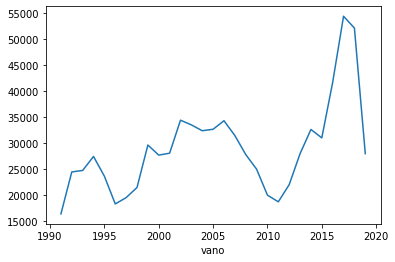

In [63]:
#Gráfico Roubo de Veículo
df['roubo_veiculo'].groupby(df['vano']).sum().plot();

> No gráfico acima, observamos um aumento expressivo nos roubos de veículos tendo seu pico o ano de 2017 com 54.366 registros.

In [12]:
# Imprimindo a Média para a Coluna furto_veiculos
print("Furto de Veiculo:\t",df["furto_veiculos"].mean())

Furto de Veiculo:	 1674.671511627907


> Já a média dos furtos de veículos que foram registrados é de aproximadamente 1.675 por mês.

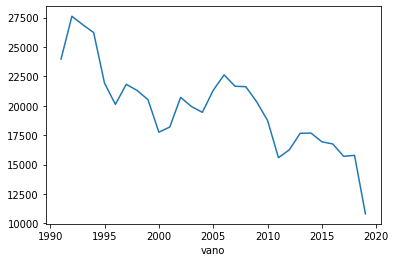

In [69]:
#Gráfico Roubo de Veículo
df['furto_veiculos'].groupby(df['vano']).sum().plot();

> Na demonstração de furtos de veículos, observamos que existe uma queda na quantidade de registros desde o inicio da série em questão. 

In [10]:
# Imprimindo a Média para a Coluna recuperacao_veiculos
print("Recuperação de Veiculo:\t",df["recuperacao_veiculos"].mean())

Recuperação de Veiculo:	 1772.2383720930231


> As recuperações de veiculos são em média de 1.772 por mês.




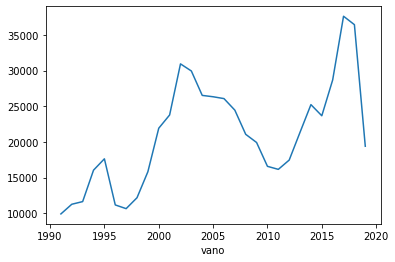

In [70]:
#Gráfico Roubo de Veículo
df['recuperacao_veiculos'].groupby(df['vano']).sum().plot();

> O gráfico acima demonstra uma reabilitação dos números absolutos de veículos recuperados, tendo o pico no ano de 2017.

In [ ]:
# Calcuando o Percentual de Recuperação de Carros Roubados
(df["recuperacao_veiculos"].sum())/(df["roubo_veiculo"].sum() + df["furto_veiculos"].sum())

0.42980346705075084

> Acima podemos observar que aproximadamente 43% dos registros de roubos e furtos possuem os veiculos recuperados no estado do Rio de Janeiro.

> Já na plotagem abaixo observamos que existe uma recuperação desse indicador onde teve o seu pico no ano de 2002 (56%), havendo uma queda nos anos seguintes até o ano de 2010 onde iniciou-se a reabilitação.

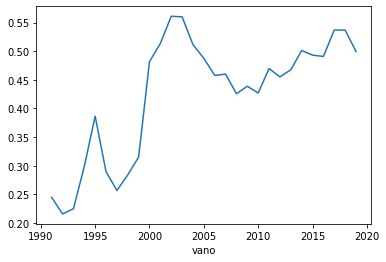

In [75]:
# Calculando o Percentual de Recuperação de Carros Roubados por Ano
((df['recuperacao_veiculos'].groupby(df['vano']).sum())/
((df['roubo_veiculo'].groupby(df['vano']).sum())+
(df['furto_veiculos'].groupby(df['vano']).sum()))).plot();

### Crimes Contra a Vida

  > Outra categoria que será analisada são os crimes contra a vida, onde observaremos os dados de homicidio doloso registrados no estado do Rio de Janeiro.

  > Abaixo segue as quantidades máximas e mínimas referente a coluna `hom_doloso` ocorridas no periodo apurado no conjunto de dados.

In [45]:
# Verificando os valores máximos do Dataset
df.loc[[df['hom_doloso'].argmax()],['vano','mes','hom_doloso']]

,vano,mes,hom_doloso
48,1995,1,831


In [46]:
# Verificando os valores minimos do Dataset
df.loc[[df['hom_doloso'].argmin()],['vano','mes','hom_doloso']]

,vano,mes,hom_doloso
293,2015,6,272


> Como observamos acima o mês que teve maiores ocorrências de homicidios dolosos foi em 01/1995 (831 Ocorrências). Já o mês que teve as menores ocorrências foi no mês 06/2015 (272 Ocorrências).

> Abaixo iremos verificar como está a evolução anual do crime de homicidio doloso no estado do Rio de Janeiro.

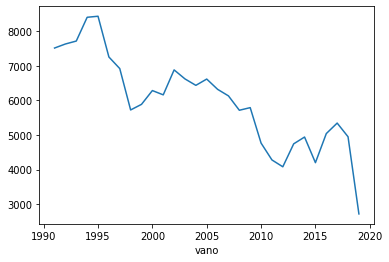

In [52]:
# Gráfico de Homicidio Doloso por Ano
df['hom_doloso'].groupby(df['vano']).sum().plot();

> Observando, podemos identificar uma queda no número de registros de homicidios doloso onde teve seu pico no ano de 1995 (8.438 Registros) e o menor valor da série no ano de 2012 (4.081 Registros) pois o ano de 2019 tem dados até o mês 8 (2.717 Registros).

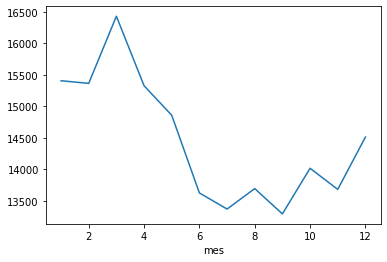

In [61]:
df['hom_doloso'].groupby(df['mes']).sum().plot();

> Na visualização acima, podemos verificar que o mês que teve maior número de ocorrências dentro do dataset em questão foi o mês 3, sendo que os 4 primeiros meses do ano possuem um volume maior de crimes em relação aos demais meses do ano.

## Conclusão

A análise realizada com base nos dados disponibilizados pelo governo do estado do Rio de Janeiro tem as seguintes considerações:
* Os roubos de veículos são em média de 2.449 registros por mês, sendo que os números estão com um aumento expressivo ano a ano desde o menor período da série.

* Os furtos de veículos são em média de 1.675 registros por mês, ao contrário do tópico anterior, os números estão caindo ano a ano desde o início do registro da série.

* A taxa de recuperação de veículos é em média de 43% por mês em relação aos registros de roubos e furtos, sendo que os números estão em reabilitação desde o ano de 2010.

* Os homicídios dolosos tiveram seu pico em 01/1995 (831 Registros) e o menor número da série o mês 06/2015 (272 Registros), sendo que em relação a toda a série os números estão em queda tendo o menor ano da série o ano de 2012.

* O mês com maior ocorrência de registros da série é março, sendo que os 4 primeiros meses possuem uma quantidade de registro maior que os demais meses


